In [1]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs

# import from project files
from utils import plot_2d, test_model

# kNN vs Decision Trees #

### kNN outperforming Decision Trees ###

Dataset-NN consists of two classes, that each have multiple individual and randomly placed clusters. kNN is able to approximate them very well, because it can adapt to arbitrarily formed decision boundaries. Decision Trees perform worse. Due to their nature of splitting the data space into regions, which only split the dataset into horizontal and vertical lines, they are not able to approximate the dataset as well as kNN.

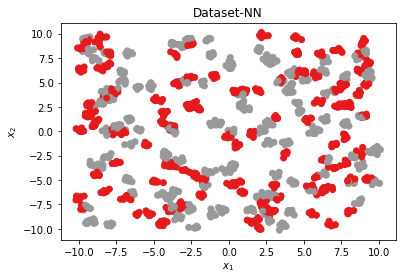

In [2]:
# Generate dataset
def data_nn():

    nn_X, nn_y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    nn_y = nn_y % 2 # to reduce the amount of different labels to 2

    return nn_X, nn_y

nn_X, nn_y = data_nn()
plot_2d(nn_X, nn_y, 'Dataset-NN')

kNN Performance on Dataset-NN:
Mean AUC score: 0.925


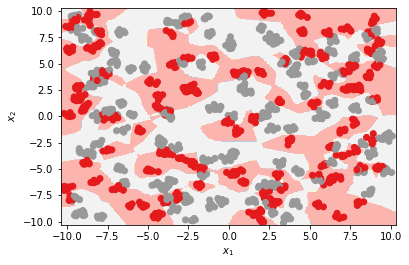

Decision Trees Performance on Dataset-NN:
Mean AUC score: 0.857


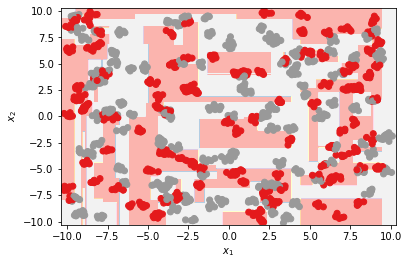

In [3]:
print('kNN Performance on Dataset-NN:')
knn = kNC(n_neighbors=3)
test_model(knn, nn_X, nn_y)

print('Decision Trees Performance on Dataset-NN:')
dtree=DTC(criterion='entropy', max_depth=25, min_samples_split=2)
test_model(dtree, nn_X, nn_y)


### Decision Trees outperforming kNN ###

Dataset-DT consists of two classes, that are distributed in vertical lines, i.e., columns, alternating between the classes. All datapoints have the same distance to one another. Decision Trees can optimally approximate this dataset, because all boundaries are vertical. kNN with lower k almost randomly assigns classes, since the majority of a datapoints 8 closest neighbors belongs to the other class. The best performance is achieved with k=17, because when looking at neighbors across 5 columns, 3 of the 5 columns belong to the class of the data point. 

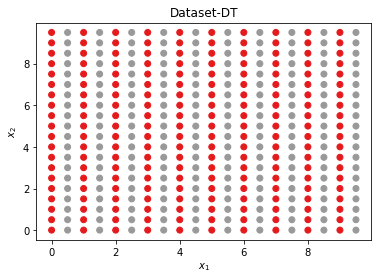

In [4]:
# Generate dataset
def data_dt():  
            
    X = []
    y = []
    for col, i in enumerate(np.arange(0, 10, 10/20, dtype=float)):
        for j in np.arange(0, 10, 10/20, dtype=float):
            X.append(np.array([i, j]))
            y.append(col % 2)
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y

dt_X, dt_y = data_dt()
plot_2d(dt_X, dt_y, 'Dataset-DT')

kNN Performance on Dataset-DT:
Mean AUC score: 0.655


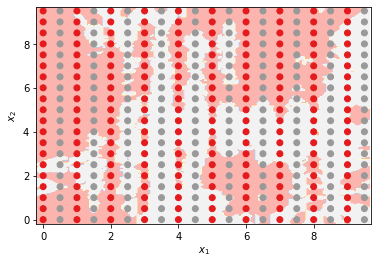

Decision Trees Performance on Dataset-DT:
Mean AUC score: 1.000


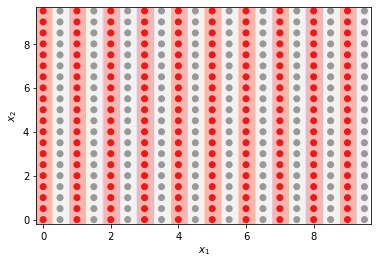

In [5]:
print('kNN Performance on Dataset-DT:')
knn = kNC(n_neighbors=17)
test_model(knn, dt_X, dt_y)

print('Decision Trees Performance on Dataset-DT:')
dtree=DTC(criterion='entropy', max_depth=None, min_samples_split=2)
test_model(dtree, dt_X, dt_y)